Para resolver el sistema de ecuaciones diferenciales ordinarias resultantes, por la propia forma de la ecuación debemos recurrir a una solución numérica. El problema de regar el café mientras se camina es un problema físico de péndulo vertical con la introducción de un término no lineal que va a ser que el líquido pueda derramarse y por esta razón inferimos que el comportamiento del sistema debe ser unas oscilaciones que se excitan o decresen con el tiempo. Como valores iniciales se escoge ($π/30$, 0) como indica en el texto Guarín; idealmente se iniciaría desde el reposo, pero esto genera que la solución al sistema sea una curva demasiado plana. Escoger los parámetros λ, ϵ y Ω adecuadamente será crucial para obtener los resultados esperados. En nuestro problema los siguientes parámetros representan:

- τ = ωt es el tiempo no dimensional.
- $\varepsilon \lambda = -\frac{\Delta z}{r_0}$ es un parámetro que relaciona la amplitud de la oscilación vertical del pivote con la longitud del péndulo. ϵ es un 'bookkeeping' parameter.
- $\Omega = \frac{\omega}{\omega_0}$ es la frecuencia de excitación no dimensional.

Se escoge $Ω=1.96$ ya que según las gráficas en la sección de Conclusiones del texto base, no es demasiado caótico pero aún muestra un comportamiento relativamente ordenado.

Los términos responsables del comportamiento no lineal de la ecuación son aquellos que involucran $ u^3$, mientras que la modulación por $ \epsilon \lambda \Omega^2 \cos(\Omega \tau)$ puede inducir inestabilidades paramétricas y contribuir a la transición al caos. Como ϵ es "bookkeeping" y también por la forma de la ecuación diferencial $u′′+[1+ελΩ2cos(Ωτ)](u−ε26u3)=0$, controla qué tanta incidencia tienen estos términos en la solución final. Donde ϵ=1 significa ningún tipo de control.

Note que al hacer ϵ=0, la ecuación (4) queda:
$u''(\tau)$ = -$u$ que tiene como porpuesta solución $c_1 cos(\tau) + c_2 sen(τ)$ que tiene por comportamiento el de un péndulo simple.

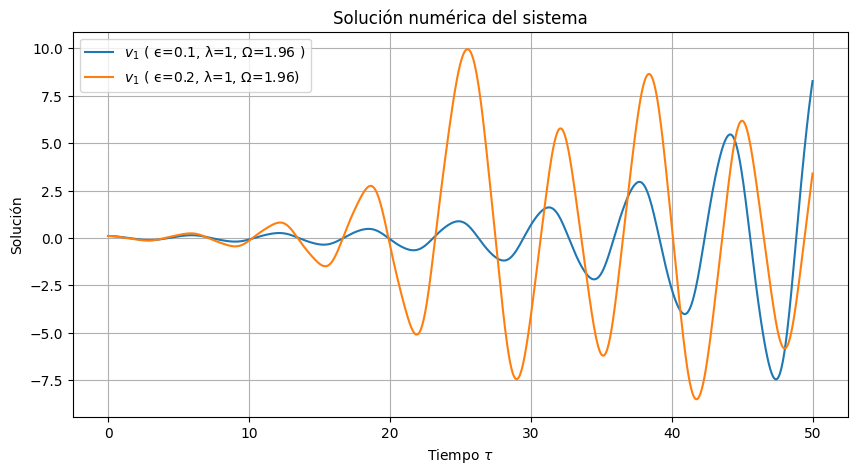

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir el sistema de EDOs
def sistema(tau, v, epsilon, lambda_, Omega):
    v1, v2 = v
    dv1_dtau = v2
    dv2_dtau = (1 + epsilon * lambda_ * Omega**2 * np.cos(Omega * tau)) * (epsilon**2 * v1**3 / 6 - v1)
    return [dv1_dtau, dv2_dtau]

# Condiciones iniciales
v0 = [np.pi/30, 0]  # v1(0) = π/30 , v2(0) = 0

# Intervalo de integración en τ
tau_span = (0, 50)  # Desde τ = 0 hasta τ = 50
tau_eval = np.linspace(*tau_span, 1000)  # Puntos donde se evaluará la solución

# Primer conjunto de parámetros
parametros1 = (0.1, 1, 1.96)  # (epsilon, lambda, Omega)

# Segundo conjunto de parámetros
parametros2 = (0.2, 1, 1.96)

# Resolver el sistema para ambos conjuntos de parámetros
sol1 = solve_ivp(sistema, tau_span, v0, args=parametros1, t_eval=tau_eval)
sol2 = solve_ivp(sistema, tau_span, v0, args=parametros2, t_eval=tau_eval)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(sol1.t, sol1.y[0], label=r'$v_1$ ( ϵ=0.1, λ=1, Ω=1.96 )')
plt.plot(sol2.t, sol2.y[0], label=r'$v_1$ ( ϵ=0.2, λ=1, Ω=1.96)')
plt.xlabel(r'Tiempo $\tau$')
plt.ylabel('Solución')
plt.legend()
plt.title('Solución numérica del sistema')
plt.grid()
plt.show()


Se puede jugar con distintas parejas de ϵ y λ que tengan sentido físico. Tenga en cuenta que $0 < ϵ < 1$; es posible que ϵ fuese mayor que 1, pero esto haría que la no linealidad y el caos reinaran nuestro sistema, eclipsando por completo la dinámica del péndulo. Y λ está relacionada con la amplitud de oscilación vertical del pivote. A continuación calculamos el dominio en el que vive λ.

# Valor máximo de $\lambda$ en términos del radio $R$

En el **Apéndice A** del texto base, se proporciona una relación aproximada para $r_0$ en términos del radio $R$ de la taza:

$
r_0 \approx 0.54 R
$

La relación entre $\lambda$, $\Delta z$ (amplitud de oscilación vertical) y $r_0$ es:

$
\varepsilon \lambda = -\frac{\Delta z}{r_0}
$

Si la altura de la taza es $H$, el valor máximo de $\Delta z$ es:

$
\Delta z \leq H
$

Sustituyendo $\Delta z = H$ en la ecuación para $\lambda$, obtenemos:

$
\lambda = -\frac{H}{0.54 R \varepsilon}
$

El signo negativo no afecta la magnitud de $\lambda$, por lo que el **valor máximo de $\lambda$** en términos de $R$ y $H$ es:

$
|\lambda| \leq \frac{H}{0.54 R \varepsilon}
$

Tenga cuidado con escoger $λ=-1$ o cercanos, porque puede inducir grandes perturbaciones en el sistema.